# K-Nearest Neighbors Example

Minimal working example for a K-Nearest Neighbor Classifier using sklearn. The dataset is purposely kept small as it's only supposed to give a simple setup draft for a K-Nearest Neighbor.

## 1. load example Data

Loading the data. In this case we use a very small version of the iris dataset, to provide a minimal working example. 

In [1]:
import pandas as pd

df = pd.read_csv(".././Data/iris.csv")
#df.head()

## 2. prepare data

Spot for data preparation. As this example is quiet simple to have a basic refference we just drop the unsude ID.

In [2]:
df = df.drop("Id", axis = 1)

## 3. set parameters

Space to set different parameters to allow for easy adjustments and keep a clean structure.

In [3]:
test_size = 0.25
random_state = 0
n_neighbors = 5

## 4. train test split

Create a train test split based on test_size set in parameters.

In [4]:
from sklearn.model_selection import train_test_split

X = df[ df.columns[df.columns!='Species']].values
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
Y = df[["Species"]].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = random_state, test_size = test_size)

## 5. Standardscaler

Standadize values, so that the distance between them loweredby generalization which makes it easier for the model to work with.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 6. train model

Train the model.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)


/Users/tkromke/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

## 7. validate model

Validate the model using different methods like a simple score, calculated values for precision and recall or via a printed confusion matrix.

In [8]:
print(model.score(X_test, y_test))

0.9736842105263158


### 7.1 confusion matrix

Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     0.9375 0.0625]
 [0.     0.     1.    ]]


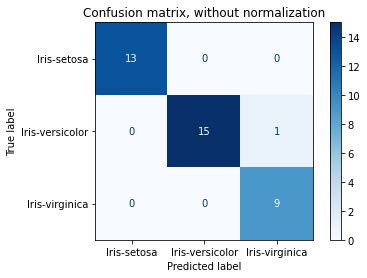

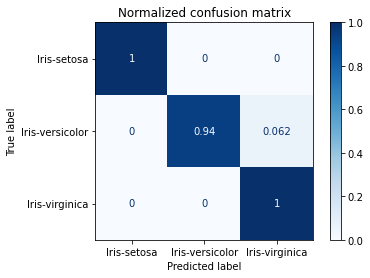

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

import numpy as np


titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=np.unique(Y),
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### 7.2 precision / recall

In [13]:
from sklearn.metrics import precision_score, recall_score

y_test_pred = model.predict(X_test)


print(precision_score(y_test, y_test_pred, average = "weighted"))
print(recall_score(y_test, y_test_pred, average = "weighted"))

0.9763157894736842
0.9736842105263158
